The Premium Paid for Horsepower in the 911

Premise:

I've anecdotally noted that people are often willing to pay wild premiums for certain 911 sub-models (GT3-series I'm lookin straight at you). Why is this? And can we capture this behaviour occuring with other sub-models with the following dataset?

Datasets:

"Every Porsche 911 since 1964"

This csv has a ton of data, the only thing we don't have access to is the true market rates for certain submodels, we will see if we can impute that later on

and

"Porsche 911 Auctions" 

This csv has a bunch of 911 auctions that I scraped late 2023. We will use this as a surrogate for price 

In [1]:
import os
os.listdir("/kaggle/input/porsche-911-auctions/")

['28NOV23_porsche_911_data_cleaned.csv']

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/every-porsche-911/porsche_911.csv")
df2 = pd.read_csv("/kaggle/input/porsche-911-auctions/28NOV23_porsche_911_data_cleaned.csv")
df2.head()

,url,seller,location,title,submodel,listing_details,private_party_or_dealer,lot,status,views,...,owners,zip_code,sold_price,sold_date,year,mileage,latitude,longitude,sales_price_standardized,sales_price_normalized
0,https://bringatrailer.com/listing/1997-porsche...,: pmotoring,"La Mesa, California 91942",1997 Porsche 911 Carrera Targa 6-Speed,Porsche 993 911 (Non-Turbo/GT2),Chassis: WP0DA2991VS385205 107k Miles Shown 3....,: Dealer,#128412,"Sold for $85,500 on 11/22/23","11,710",...,CARFAX 1-Owner vehicle,91942,85500.0,2023-11-22,1997.0,107000.0,32.784549,-117.016349,0.059669,0.059669
1,https://bringatrailer.com/listing/2018-porsche...,: mark_starr,"Mount Kisco, New York 10549",14k-Mile 2018 Porsche 911 Carrera 4S Cabriolet,Porsche 991 911 (Non-Turbo/GT2/GT3),Chassis: WP0CB2A99JS147164 14k Miles Twin-Turb...,: Dealer,#128239,"Sold for $106,000 on 11/20/23","6,401",...,CARFAX 1-Owner vehicle,10549,106000.0,2023-11-20,2018.0,14000.0,37.621440,126.893215,0.076013,0.076013
2,https://bringatrailer.com/listing/1996-porsche...,: SWVintage,"Phoenix, Arizona 85018",28k-Mile 1996 Porsche 911 Carrera 4S 6-Speed,Porsche 993 911 (Non-Turbo/GT2),Chassis: WP0AA2999TS321414 28k Miles Shown 3.6...,: Dealer,#128255,"Sold for $181,993 on 11/20/23","22,258",...,"Types of owners: Corporate, Personal",85018,181993.0,2023-11-20,1996.0,28000.0,48.554002,37.231345,0.136596,0.136596
3,https://bringatrailer.com/listing/2003-porsche...,: ExclusiveMotorClub,"Chandler, Arizona 85226",2003 Porsche 911 Carrera 4S Coupe 6-Speed,Porsche 996 911 (Non-Turbo/GT2/GT3),Chassis: WP0AA29933S624012 76k Miles 3.6-Liter...,: Dealer,#128233,"Sold for $36,000 on 11/20/23","10,402",...,"Types of owners: Lease, Personal",85226,36000.0,2023-11-20,2003.0,76000.0,33.309308,-111.922032,0.020207,0.020207
4,https://bringatrailer.com/listing/2014-porsche...,: Worldclassmotorcars,"Wildwood, Missouri 63005",19k-Mile 2014 Porsche 911 Carrera 4S Cabriolet,Porsche 991 911 (Non-Turbo/GT2/GT3),Chassis: WP0CB2A90ES154445 19k Miles 3.8-Liter...,: Dealer,#128353,"Sold for $71,500 on 11/21/23","7,051",...,2Previous owners,63005,71500.0,2023-11-21,2014.0,19000.0,57.975220,26.961682,0.048508,0.048508


In [3]:
df.describe()

,start_of_production,doors,maximum_speed,power_per_litre,engine_displacement,number_of_cylinders,cylinder_bore,piston_stroke,number_of_valves_per_cylinder,max_weight,...,length,wheelbase,minimum_turning_diameter,fuel_consumption_urban,co2_emissions,compression_ratio,engine_oil_capacity,drag_coefficient,acceleration_0-60mph,end_of_production
count,288.000000,288.0,276.000000,286.000000,286.000000,284.0,217.000000,217.000000,252.000000,257.000000,...,287.000000,288.000000,176.000000,209.000000,153.000000,250.000000,272.000000,172.000000,246.000000,253.000000
mean,2002.145833,2.0,283.659420,105.351399,3359.902098,6.0,95.248848,75.784332,3.404762,1816.634241,...,4407.135889,2362.576389,10.943466,15.451196,242.450980,10.718400,8.661949,0.307093,4.601626,2002.150198
std,15.675262,0.0,30.240971,29.707074,495.127470,0.0,6.139792,4.053192,0.916242,203.514431,...,119.533179,76.600059,0.335814,2.821656,37.744805,1.585977,1.417274,0.017463,1.056215,15.143008
min,1964.000000,2.0,200.000000,55.200000,1991.000000,6.0,80.000000,66.000000,2.000000,1300.000000,...,4147.000000,2211.000000,10.300000,9.900000,169.000000,6.500000,6.800000,0.280000,2.600000,1967.000000
25%,1994.000000,2.0,275.000000,82.850000,2981.000000,6.0,91.000000,74.400000,2.000000,1720.000000,...,4291.000000,2272.000000,10.900000,13.000000,212.000000,9.800000,7.500000,0.300000,3.900000,1993.000000
50%,2007.500000,2.0,289.000000,101.300000,3596.000000,6.0,96.000000,76.400000,4.000000,1885.000000,...,4435.000000,2350.000000,10.900000,16.100000,237.000000,11.300000,8.300000,0.300000,4.550000,2008.000000
75%,2015.000000,2.0,306.000000,128.800000,3800.000000,6.0,100.000000,77.500000,4.000000,1960.000000,...,4506.000000,2450.000000,11.100000,17.500000,275.000000,12.500000,9.000000,0.310000,5.100000,2015.000000
max,2023.000000,2.0,340.000000,184.200000,3996.000000,6.0,102.000000,82.800000,4.000000,2100.000000,...,4573.000000,2516.000000,12.350000,23.500000,326.000000,13.300000,13.000000,0.390000,9.500000,2020.000000


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing Values Count per Column:")
print(missing_values[missing_values > 0])


Missing Values Count per Column:
acceleration_0-100km/h            33
acceleration_0-62mph              33
maximum_speed                     12
weight-to-power_ratio             18
weight-to-torque_ratio            22
power_per_litre                    2
torque                             4
engine_displacement                2
number_of_cylinders                4
engine_configuration               2
cylinder_bore                     71
piston_stroke                     71
number_of_valves_per_cylinder     36
fuel_injection_system             19
engine_aspiration                  1
kerb_weight                       18
max_weight                        31
max_load                          31
fuel_tank_capacity                32
length                             1
width                              1
height                             4
minimum_turning_diameter         112
drivetrain_architecture           98
front_suspension                   3
rear_suspension                    3
assis

In [5]:
# Now let's focus in on horsepower and see how it's changed over the years
def horsepower_to_int(power):
    if power and 'Hp' in power:
        hp = power.split(' ')[0]  # Splitting by space and taking the first part
        return int(hp)  # Converting to integer
    return None  # Return None if 'power' is empty or 'Hp' not in string

# Apply this function to your dataframe
df['horsepower'] = df['power'].apply(horsepower_to_int)

# Now, calculate the average horsepower per year
average_hp_per_year = df.groupby('start_of_production')['horsepower'].mean().reset_index()
average_hp_per_year.rename(columns={'horsepower': 'Average Horsepower'}, inplace=True)



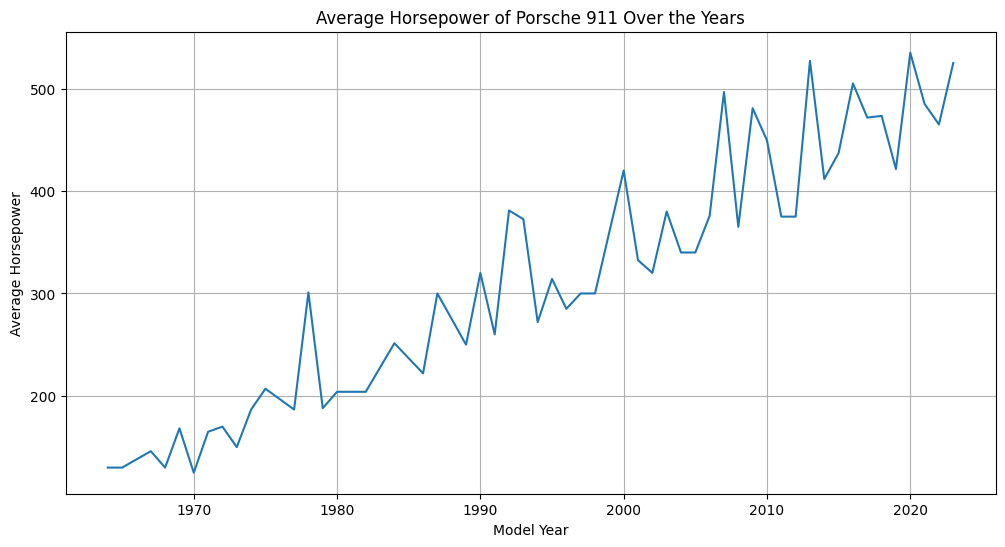

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_hp_per_year, x='start_of_production', y='Average Horsepower')
plt.title('Average Horsepower of Porsche 911 Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True)
plt.show()


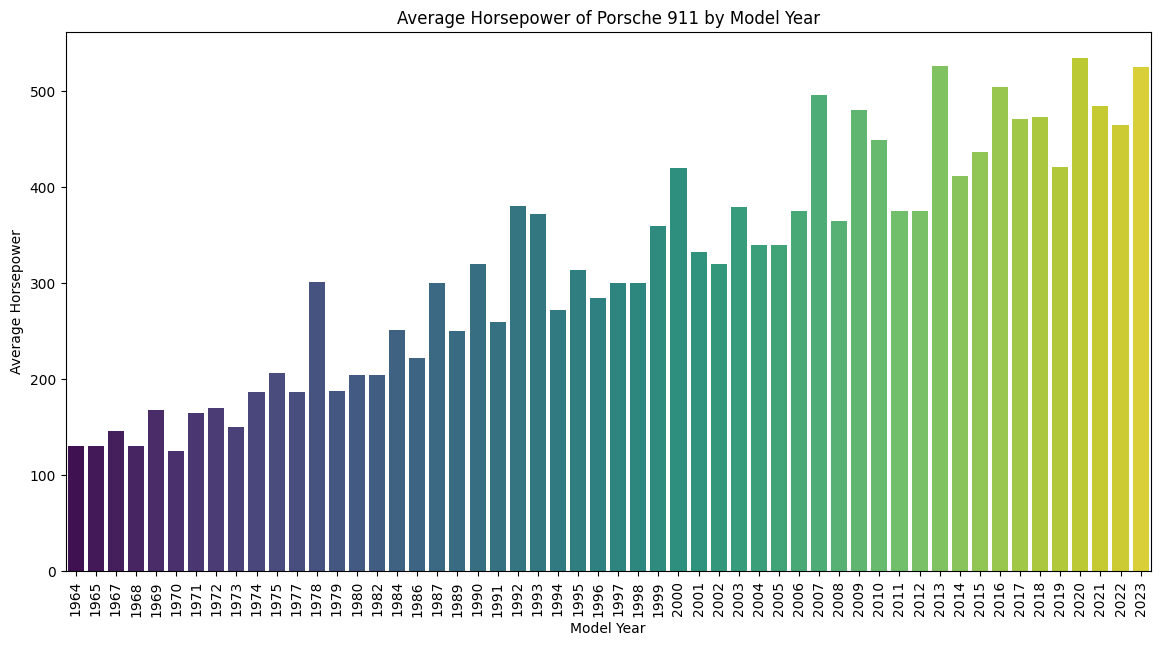

In [7]:
plt.figure(figsize=(14, 7))
sns.barplot(data=average_hp_per_year, x='start_of_production', y='Average Horsepower', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Horsepower of Porsche 911 by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.show()


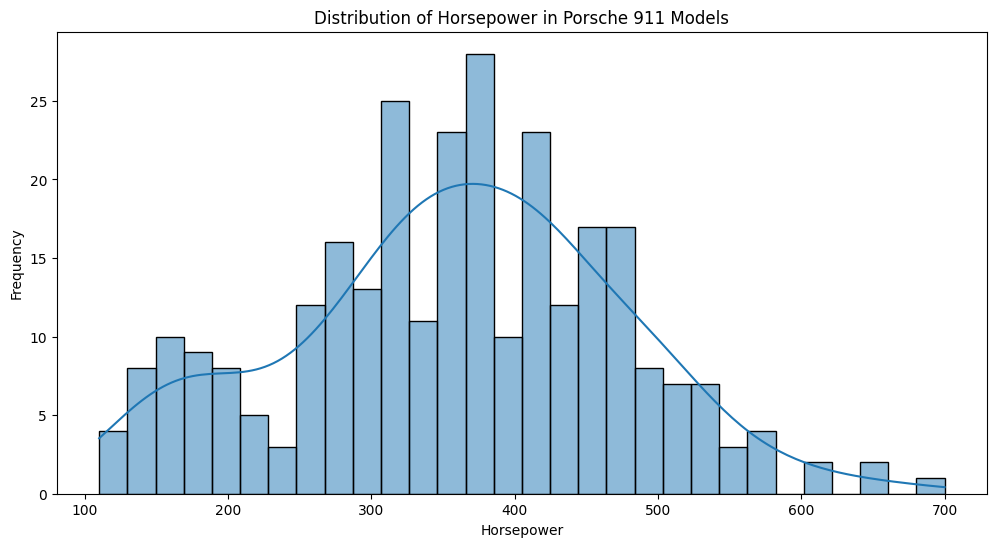

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['horsepower'], bins=30, kde=True)
plt.title('Distribution of Horsepower in Porsche 911 Models')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()


In [9]:
import plotly.express as px

fig = px.line(average_hp_per_year, x='start_of_production', y='Average Horsepower', markers=True, title='Porsche 911: Average Horsepower Over the Years')
fig.update_layout(xaxis_title='Model Year', yaxis_title='Average Horsepower')
fig.show()


In [10]:
# Let's see if we can use my scraped data to get general numbers for the price of each sub model

df2.describe()

# Check for missing values in each column
missing_values = df2.isnull().sum()

# Print the number of missing values for each column
print("Missing Values Count per Column:")
print(missing_values[missing_values > 0])


Missing Values Count per Column:
submodel                      1
private_party_or_dealer       2
accidents                  4325
owners                     4342
dtype: int64


In [11]:
# Group by 'year' and 'submodel', then calculate the average sold price
average_price = df2.groupby(['year', 'submodel'])['sold_price'].mean().reset_index()
average_price.rename(columns={'sold_price': 'average_sold_price'}, inplace=True)
# Merge the average price data with df2
# Ensure the column names used for merging correspond to those in df2
merged_df = pd.merge(df2, average_price, on=['year', 'submodel'], how='left')
# Check for missing values in the merged DataFrame
missing_values = merged_df['average_sold_price'].isnull().sum()
print(f"Missing values in 'average_sold_price': {missing_values}")


Missing values in 'average_sold_price': 1


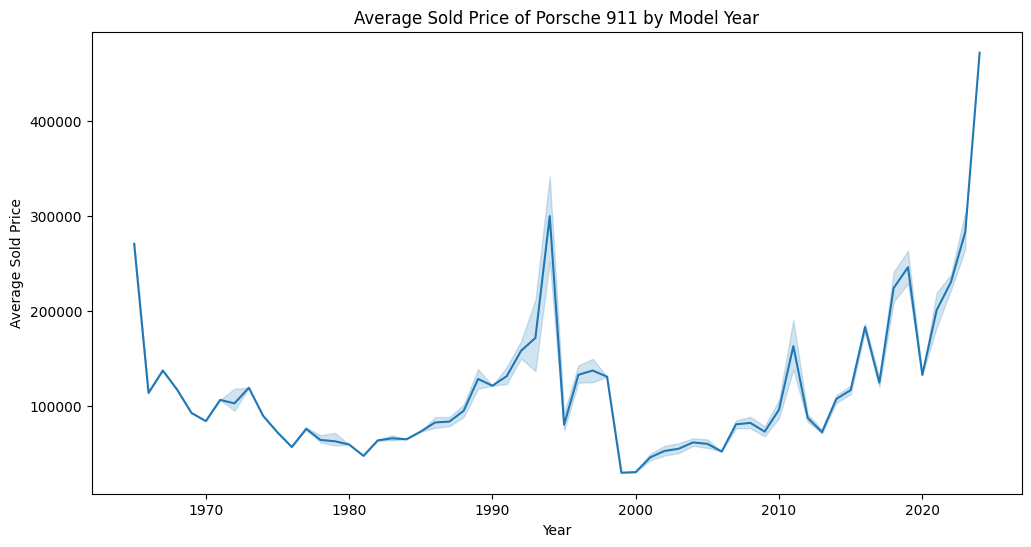

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='average_sold_price')
plt.title('Average Sold Price of Porsche 911 by Model Year')
plt.xlabel('Year')
plt.ylabel('Average Sold Price')
plt.show()


In [13]:
df2.head()

,url,seller,location,title,submodel,listing_details,private_party_or_dealer,lot,status,views,...,owners,zip_code,sold_price,sold_date,year,mileage,latitude,longitude,sales_price_standardized,sales_price_normalized
0,https://bringatrailer.com/listing/1997-porsche...,: pmotoring,"La Mesa, California 91942",1997 Porsche 911 Carrera Targa 6-Speed,Porsche 993 911 (Non-Turbo/GT2),Chassis: WP0DA2991VS385205 107k Miles Shown 3....,: Dealer,#128412,"Sold for $85,500 on 11/22/23","11,710",...,CARFAX 1-Owner vehicle,91942,85500.0,2023-11-22,1997.0,107000.0,32.784549,-117.016349,0.059669,0.059669
1,https://bringatrailer.com/listing/2018-porsche...,: mark_starr,"Mount Kisco, New York 10549",14k-Mile 2018 Porsche 911 Carrera 4S Cabriolet,Porsche 991 911 (Non-Turbo/GT2/GT3),Chassis: WP0CB2A99JS147164 14k Miles Twin-Turb...,: Dealer,#128239,"Sold for $106,000 on 11/20/23","6,401",...,CARFAX 1-Owner vehicle,10549,106000.0,2023-11-20,2018.0,14000.0,37.621440,126.893215,0.076013,0.076013
2,https://bringatrailer.com/listing/1996-porsche...,: SWVintage,"Phoenix, Arizona 85018",28k-Mile 1996 Porsche 911 Carrera 4S 6-Speed,Porsche 993 911 (Non-Turbo/GT2),Chassis: WP0AA2999TS321414 28k Miles Shown 3.6...,: Dealer,#128255,"Sold for $181,993 on 11/20/23","22,258",...,"Types of owners: Corporate, Personal",85018,181993.0,2023-11-20,1996.0,28000.0,48.554002,37.231345,0.136596,0.136596
3,https://bringatrailer.com/listing/2003-porsche...,: ExclusiveMotorClub,"Chandler, Arizona 85226",2003 Porsche 911 Carrera 4S Coupe 6-Speed,Porsche 996 911 (Non-Turbo/GT2/GT3),Chassis: WP0AA29933S624012 76k Miles 3.6-Liter...,: Dealer,#128233,"Sold for $36,000 on 11/20/23","10,402",...,"Types of owners: Lease, Personal",85226,36000.0,2023-11-20,2003.0,76000.0,33.309308,-111.922032,0.020207,0.020207
4,https://bringatrailer.com/listing/2014-porsche...,: Worldclassmotorcars,"Wildwood, Missouri 63005",19k-Mile 2014 Porsche 911 Carrera 4S Cabriolet,Porsche 991 911 (Non-Turbo/GT2/GT3),Chassis: WP0CB2A90ES154445 19k Miles 3.8-Liter...,: Dealer,#128353,"Sold for $71,500 on 11/21/23","7,051",...,2Previous owners,63005,71500.0,2023-11-21,2014.0,19000.0,57.975220,26.961682,0.048508,0.048508
